In [22]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

In [23]:
df = pd.read_csv("NSC_data.csv")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   samples               101 non-null    object 
 1   accuracy(ave_F1)      101 non-null    float64
 2   ave_precision         101 non-null    float64
 3   ave_recall            101 non-null    float64
 4   authentic_mislabeled  101 non-null    object 
 5   synthetic_mislabeled  101 non-null    object 
 6   top_10_features       101 non-null    object 
dtypes: float64(3), object(4)
memory usage: 5.7+ KB


In [25]:
df.head()

,samples,accuracy(ave_F1),ave_precision,ave_recall,authentic_mislabeled,synthetic_mislabeled,top_10_features
0,"['ALCOTT_synthetic_combined_132.txt', 'ALCOTT_...",0.715345,0.721987,0.7175,"['Twain_740.txt', 'Twain_1485.txt', 'Twain_258...","['ALCOTT_synthetic_combined_23.txt', 'HOPKINS_...","{'mean_sen_len': 4.857105858499239, 'VADER_sen..."
1,"['ALCOTT_synthetic_combined_189.txt', 'ALCOTT_...",0.791949,0.799582,0.7950,"['Gaskell_855.txt', 'Dickens_4099.txt', 'Chesn...","['BRONTE_synthetic_combined_146.txt', 'DICKENS...","{'mean_sen_len': 4.6077715251340585, 'VADER_se..."
2,"['ALCOTT_synthetic_combined_22.txt', 'ALCOTT_s...",0.697574,0.699122,0.6975,"['Chesnutt_19.txt', 'Alcott_2390.txt', 'Alcott...","['CHESNUTT_synthetic_combined_79.txt', 'DICKEN...","{'mean_sen_len': 4.018386006595872, 'VADER_sen..."
3,"['ALCOTT_synthetic_combined_50.txt', 'ALCOTT_s...",0.766642,0.767967,0.7675,"['Stoker_610.txt', 'Austen_212.txt', 'Austen_3...","['STOKER_synthetic_combined_60.txt', 'CHESNUTT...","{'mean_sen_len': 4.9454690512581365, 'VADER_se..."
4,"['ALCOTT_synthetic_combined_9.txt', 'ALCOTT_sy...",0.755950,0.762515,0.7575,"['Twain_519.txt', 'Alcott_1381.txt', 'Twain_33...","['CHESNUTT_synthetic_combined_75.txt', 'STOKER...","{'mean_sen_len': 4.869718156831961, 'VADER_sen..."


In [26]:
df = df.sort_values("accuracy(ave_F1)", ascending=False)
df.head(10)

,samples,accuracy(ave_F1),ave_precision,ave_recall,authentic_mislabeled,synthetic_mislabeled,top_10_features
92,"['ALCOTT_synthetic_combined_111.txt', 'ALCOTT_...",0.807564,0.825584,0.8100,"['Griggs_123.txt', 'Austen_492.txt', 'Twain_17...","['DICKENS_synthetic_combined_145.txt', 'BRONTE...","{'mean_sen_len': 5.095029721674745, 'VADER_sen..."
84,"['ALCOTT_synthetic_combined_81.txt', 'ALCOTT_s...",0.806553,0.813084,0.8075,"['Griggs_393.txt', 'Bronte_48.txt', 'Stoker_45...","['BRONTE_synthetic_combined_112.txt', 'HOPKINS...","{'mean_sen_len': 4.698460349412407, 'VADER_sen..."
66,"['ALCOTT_synthetic_combined_122.txt', 'ALCOTT_...",0.803598,0.811464,0.8050,"['Alcott_1343.txt', 'Bronte_1528.txt', 'Alcott...","['BRONTE_synthetic_combined_114.txt', 'BRONTE_...","{'mean_sen_len': 4.8094227703589745, 'VADER_se..."
98,"['ALCOTT_synthetic_combined_149.txt', 'ALCOTT_...",0.798593,0.813593,0.8000,"['Dickens_280.txt', 'Bronte_868.txt', 'Alcott_...","['BRONTE_synthetic_combined_167.txt', 'DICKENS...","{'mean_sen_len': 4.5814546493369726, 'VADER_se..."
67,"['ALCOTT_synthetic_combined_41.txt', 'ALCOTT_s...",0.796918,0.803680,0.7975,"['Bronte_797.txt', 'Twain_1677.txt', 'Gaskell_...","['BRONTE_synthetic_combined_144.txt', 'BRONTE_...","{'mean_sen_len': 4.739033073418799, 'VADER_sen..."
74,"['ALCOTT_synthetic_combined_12.txt', 'ALCOTT_s...",0.793951,0.804599,0.7950,"['Twain_2108.txt', 'Chesnutt_186.txt', 'Alcott...","['ALCOTT_synthetic_combined_25.txt', 'BRONTE_s...","{'mean_sen_len': 4.762487186661755, 'VADER_sen..."
5,"['ALCOTT_synthetic_combined_74.txt', 'ALCOTT_s...",0.793605,0.801349,0.7950,"['Chesnutt_142.txt', 'Chesnutt_228.txt', 'Grig...","['BRONTE_synthetic_combined_113.txt', 'ALCOTT_...","{'mean_sen_len': 4.5510043159395295, 'VADER_se..."
1,"['ALCOTT_synthetic_combined_189.txt', 'ALCOTT_...",0.791949,0.799582,0.7950,"['Gaskell_855.txt', 'Dickens_4099.txt', 'Chesn...","['BRONTE_synthetic_combined_146.txt', 'DICKENS...","{'mean_sen_len': 4.6077715251340585, 'VADER_se..."
80,"['ALCOTT_synthetic_combined_142.txt', 'ALCOTT_...",0.791380,0.807274,0.7925,"['Bronte_98.txt', 'Gaskell_999.txt', 'Alcott_9...","['TWAIN_synthetic_combined_45.txt', 'TWAIN_syn...","{'mean_sen_len': 4.724366356870799, 'VADER_sen..."
37,"['ALCOTT_synthetic_combined_191.txt', 'ALCOTT_...",0.786687,0.790267,0.7875,"['Dickens_2493.txt', 'Austen_97.txt', 'Twain_1...","['BRONTE_synthetic_combined_140.txt', 'STOKER_...","{'mean_sen_len': 4.738398705468242, 'VADER_sen..."


In [27]:
df_sorted = df.sort_values("accuracy(ave_F1)", ascending=False).reset_index()
df_sorted.head()


,index,samples,accuracy(ave_F1),ave_precision,ave_recall,authentic_mislabeled,synthetic_mislabeled,top_10_features
0,92,"['ALCOTT_synthetic_combined_111.txt', 'ALCOTT_...",0.807564,0.825584,0.8100,"['Griggs_123.txt', 'Austen_492.txt', 'Twain_17...","['DICKENS_synthetic_combined_145.txt', 'BRONTE...","{'mean_sen_len': 5.095029721674745, 'VADER_sen..."
1,84,"['ALCOTT_synthetic_combined_81.txt', 'ALCOTT_s...",0.806553,0.813084,0.8075,"['Griggs_393.txt', 'Bronte_48.txt', 'Stoker_45...","['BRONTE_synthetic_combined_112.txt', 'HOPKINS...","{'mean_sen_len': 4.698460349412407, 'VADER_sen..."
2,66,"['ALCOTT_synthetic_combined_122.txt', 'ALCOTT_...",0.803598,0.811464,0.8050,"['Alcott_1343.txt', 'Bronte_1528.txt', 'Alcott...","['BRONTE_synthetic_combined_114.txt', 'BRONTE_...","{'mean_sen_len': 4.8094227703589745, 'VADER_se..."
3,98,"['ALCOTT_synthetic_combined_149.txt', 'ALCOTT_...",0.798593,0.813593,0.8000,"['Dickens_280.txt', 'Bronte_868.txt', 'Alcott_...","['BRONTE_synthetic_combined_167.txt', 'DICKENS...","{'mean_sen_len': 4.5814546493369726, 'VADER_se..."
4,67,"['ALCOTT_synthetic_combined_41.txt', 'ALCOTT_s...",0.796918,0.803680,0.7975,"['Bronte_797.txt', 'Twain_1677.txt', 'Gaskell_...","['BRONTE_synthetic_combined_144.txt', 'BRONTE_...","{'mean_sen_len': 4.739033073418799, 'VADER_sen..."


In [51]:
from statistics import mean 
accuracy_values = (df['accuracy(ave_F1)']).tolist()
print("Mean accuracy for NSC: " + str(mean(accuracy_values)))
print("Max accuracy for NSC: " + str(max(accuracy_values)))


Mean accuracy for NSC: 0.7311644374705565
Max accuracy for NSC: 0.8075642877048972


## Exploring range in F1 scores ##

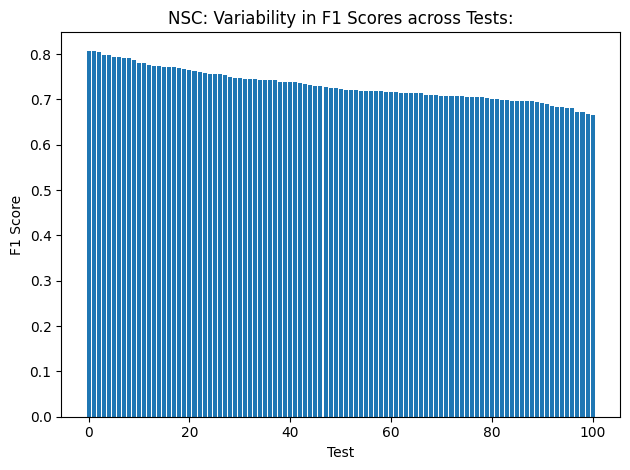

In [29]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(df_sorted.index.values, df_sorted['accuracy(ave_F1)'])

# Step 2: Labeling the graph
plt.xlabel('Test')
plt.ylabel('F1 Score')
plt.title('NSC: Variability in F1 Scores across Tests:')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

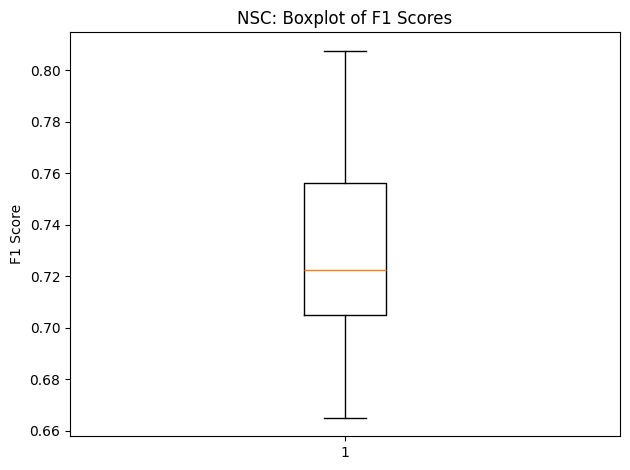

In [30]:
plt.figure()  # Optional: Adjust figure size if necessary
plt.boxplot(df['accuracy(ave_F1)'])

# Step 2: Label the graph
plt.ylabel('F1 Score')
plt.title('NSC: Boxplot of F1 Scores')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

## Visualizations for all runs of NSC classifier ##

In [31]:
authentic = df['authentic_mislabeled'].tolist()

authentic_mislabeled = []

import ast

# Iterate over each string in the list
for item in authentic:
    # Convert the string representation of the list into an actual list using ast.literal_eval
    sublist = ast.literal_eval(item)
    # Extend the flat_list with elements from the sublist
    authentic_mislabeled.extend(sublist)

author_mislabeled = []

for x in authentic_mislabeled:
    name = x.split("_")[0]
    author_mislabeled.append(name.lower())



string_counts = Counter(author_mislabeled)

# Create a DataFrame from the Counter dictionary
auth_df = pd.DataFrame(list(string_counts.items()), columns=['author', 'Count'])
auth_df = auth_df.sort_values("Count", ascending=False)

print("Number of times an authentic chunk by an author was labelled synthetic out of 200,000 samples (2000 samples by 100 runs):")

auth_df.head(10)

Number of times an authentic chunk by an author was labelled synthetic out of 200,000 samples (2000 samples by 100 runs):


,author,Count
1,austen,918
6,alcott,906
2,twain,770
7,gaskell,750
5,chesnutt,629
3,bronte,626
4,dickens,599
0,griggs,344
8,stoker,253
9,hopkins,132


In [34]:
len(authentic_mislabeled)

5927

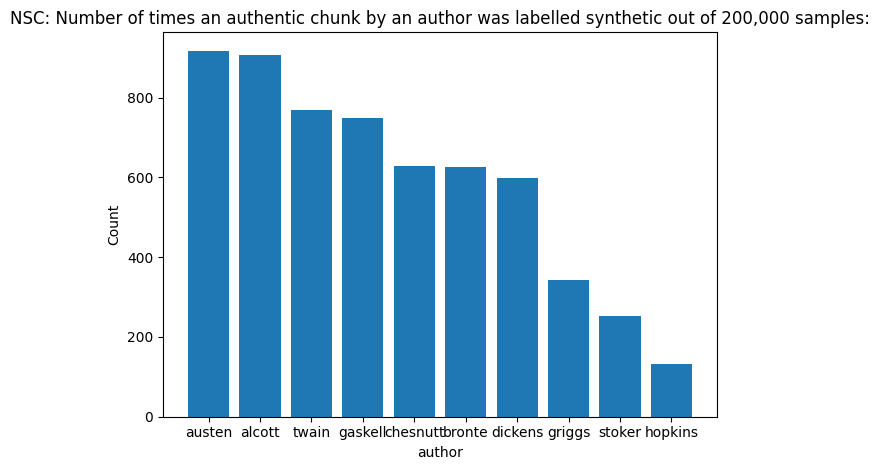

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(auth_df['author'], auth_df['Count'])

# Step 2: Labeling the graph
plt.xlabel('author')
plt.ylabel('Count')
plt.title('NSC: Number of times an authentic chunk by an author was labelled synthetic out of 200,000 samples:')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

plt.savefig('authentic_mislabeled.png', dpi=300)  # Save as PNG with 300 DPI

In [36]:
synthetic = df['synthetic_mislabeled'].tolist()

synthetic_mislabeled = []

import ast

# Iterate over each string in the list
for item in synthetic:
    # Convert the string representation of the list into an actual list using ast.literal_eval
    sublist = ast.literal_eval(item)
    # Extend the flat_list with elements from the sublist
    synthetic_mislabeled.extend(sublist)

author_mislabeled_syn = []

for x in synthetic_mislabeled:
    name = x.split("_")[0]
    author_mislabeled_syn.append(name.lower())

string_counts_syn = Counter(author_mislabeled_syn)

# Create a DataFrame from the Counter dictionary
auth_df_syn = pd.DataFrame(list(string_counts_syn.items()), columns=['author', 'Count'])
auth_df_syn = auth_df_syn.sort_values("Count", ascending=False)

print("Number of times an synthetic chunk by GPT mimicking an author was labelled authentic out of 200,000 samples (2000 samples by 100 runs):")

auth_df_syn.head(10)

Number of times an synthetic chunk by GPT mimicking an author was labelled authentic out of 200,000 samples (2000 samples by 100 runs):


,author,Count
1,bronte,996
2,twain,721
4,stoker,721
0,dickens,484
3,alcott,435
6,hopkins,423
5,griggs,402
8,chesnutt,324
7,austen,254
9,gaskell,149


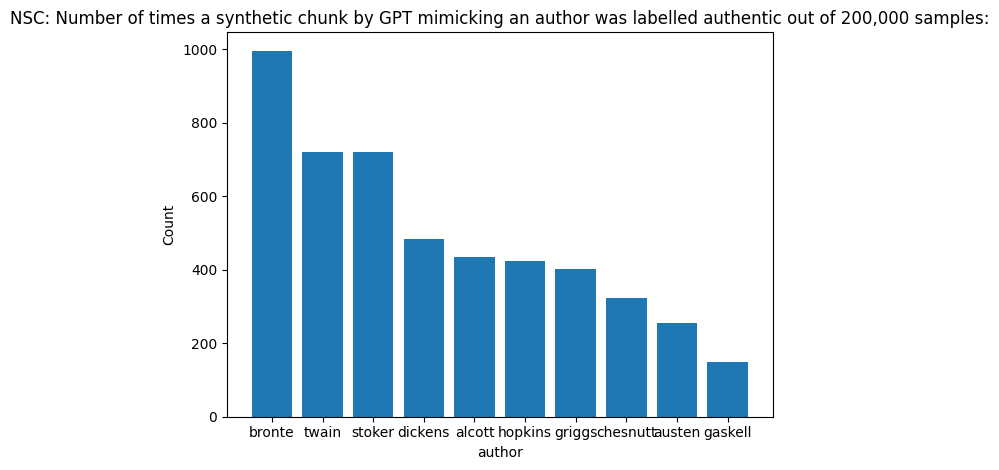

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(auth_df_syn['author'], auth_df_syn['Count'])

# Step 2: Labeling the graph
plt.xlabel('author')
plt.ylabel('Count')
plt.title('NSC: Number of times a synthetic chunk by GPT mimicking an author was labelled authentic out of 200,000 samples:')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

plt.savefig('synthetic_mislabeled.png', dpi=300)  # Save as PNG with 300 DPI

In [38]:
dict_list = []

# Loop through the column, and check if the row is a dictionary or a string
for index, row in df['top_10_features'].items():
    if isinstance(row, str):
        # Convert the string to a dictionary
        row_dict = ast.literal_eval(row)
    elif isinstance(row, dict):
        # If it's already a dictionary, use it directly
        row_dict = row
    else:
        # Skip if the row is neither a string nor a dictionary
        print(f"Row {index} is not a valid type, skipping.")
        continue
    
    # Append the dictionary to the list
    dict_list.append(row_dict)

all_keys = []

# Loop through each dictionary and extract the keys
for d in dict_list:
    all_keys.extend(d.keys())

# Use Counter to count the occurrences of each key
key_counts = Counter(all_keys)

# Convert the Counter dictionary to a DataFrame
feature_keys_df = pd.DataFrame(list(key_counts.items()), columns=['Key', 'Count'])

feature_keys_df.sort_values("Count", ascending=False)

,Key,Count
0,mean_sen_len,101
1,VADER_sentiment,101
2,the,101
3,of,101
4,i,101
5,a,101
6,to,101
9,he,77
8,male_pronouns,76
7,TTR,74


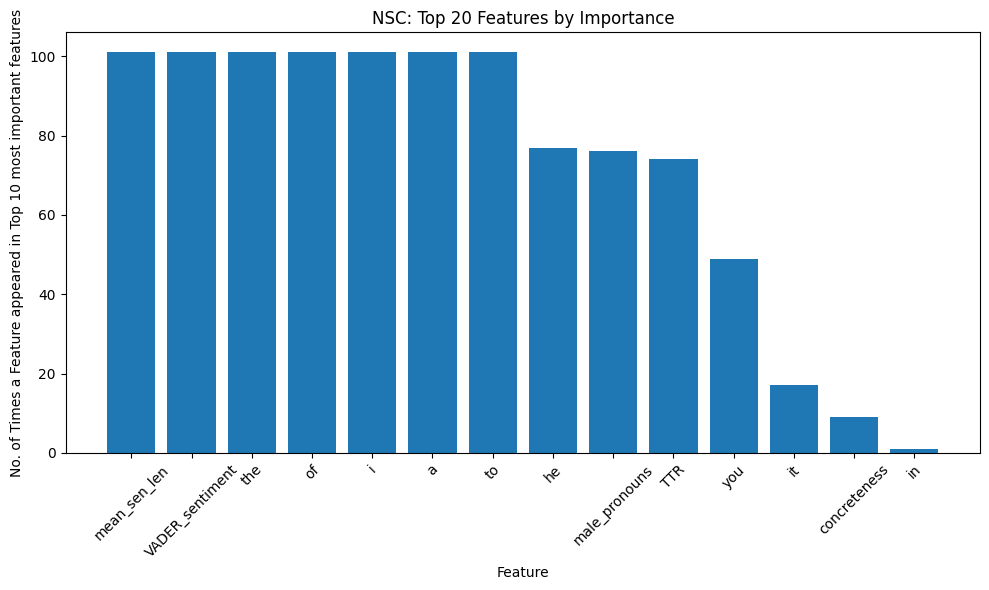

<Figure size 640x480 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you want the top 10 rows based on a 'Count' column
top_features_df = feature_keys_df.nlargest(20, 'Count')  # Adjust 'Count' to the column you want to sort by

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(top_features_df['Key'], top_features_df['Count'])  # Use appropriate column names

# Labeling the graph
plt.xlabel('Feature')
plt.ylabel('No. of Times a Feature appeared in Top 10 most important features')
plt.title('NSC: Top 20 Features by Importance')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the bar chart
plt.tight_layout()
plt.show()

plt.savefig('top_features.png', dpi=300)  # Save as PNG with 300 DPI

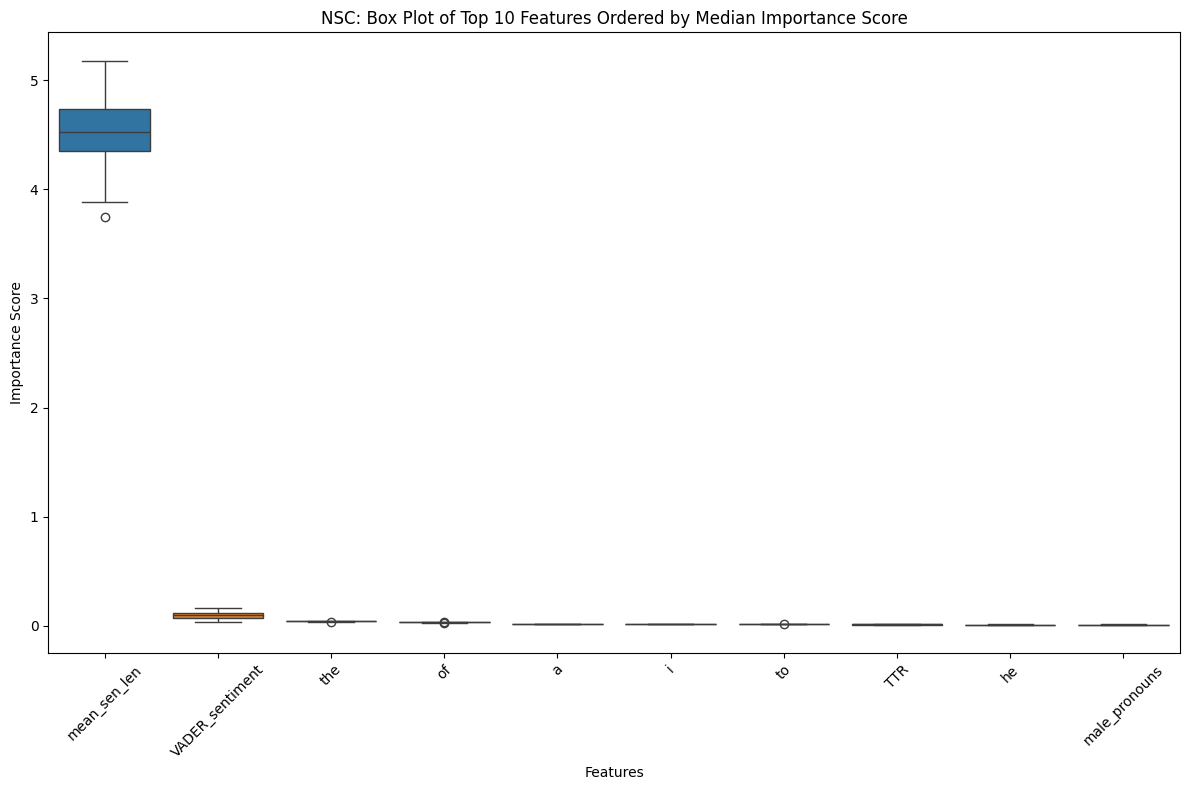

<Figure size 640x480 with 0 Axes>

In [40]:
import seaborn as sns

# Step 2: Get the top 20 keys based on their occurrence
top_10_keys = [k for k, v in key_counts.most_common(10)]

# Step 3: Create a dictionary to store values associated with each key
key_values = {key: [] for key in top_10_keys}

# Step 4: Collect values for each key across all dictionaries
for d in dict_list:
    for key in top_10_keys:
        if key in d:
            key_values[key].append(d[key])

# Step 5: Convert key-values dictionary into a DataFrame for plotting
data = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in key_values.items()]))

medians = data.median().sort_values(ascending=False)
data = data[medians.index]  # Reorder DataFrame columns based on sorted medians

# Step 7: Create a box plot for the top 20 keys ordered by median
plt.figure(figsize=(12, 8))  # Adjust the figure size if necessary
sns.boxplot(data=data)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('NSC: Box Plot of Top 10 Features Ordered by Median Importance Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the box plot
plt.tight_layout()
plt.show()

plt.savefig('top_features_boxplot.png', dpi=300)  # Save as PNG with 300 DPI

## Visualizations just for NSC runs with highest accuracy ##

In [41]:
df_top = df_sorted[df_sorted['accuracy(ave_F1)'] > 0.8]

In [42]:
df_top

,index,samples,accuracy(ave_F1),ave_precision,ave_recall,authentic_mislabeled,synthetic_mislabeled,top_10_features
0,92,"['ALCOTT_synthetic_combined_111.txt', 'ALCOTT_...",0.807564,0.825584,0.8100,"['Griggs_123.txt', 'Austen_492.txt', 'Twain_17...","['DICKENS_synthetic_combined_145.txt', 'BRONTE...","{'mean_sen_len': 5.095029721674745, 'VADER_sen..."
1,84,"['ALCOTT_synthetic_combined_81.txt', 'ALCOTT_s...",0.806553,0.813084,0.8075,"['Griggs_393.txt', 'Bronte_48.txt', 'Stoker_45...","['BRONTE_synthetic_combined_112.txt', 'HOPKINS...","{'mean_sen_len': 4.698460349412407, 'VADER_sen..."
2,66,"['ALCOTT_synthetic_combined_122.txt', 'ALCOTT_...",0.803598,0.811464,0.8050,"['Alcott_1343.txt', 'Bronte_1528.txt', 'Alcott...","['BRONTE_synthetic_combined_114.txt', 'BRONTE_...","{'mean_sen_len': 4.8094227703589745, 'VADER_se..."


In [43]:
authentic_top = df_top['authentic_mislabeled'].tolist()

authentic_mislabeled_top = []

import ast

# Iterate over each string in the list
for item in authentic_top:
    # Convert the string representation of the list into an actual list using ast.literal_eval
    sublist = ast.literal_eval(item)
    # Extend the flat_list with elements from the sublist
    authentic_mislabeled_top.extend(sublist)

author_mislabeled_top = []

for x in authentic_mislabeled_top:
    name = x.split("_")[0]
    author_mislabeled_top.append(name.lower())



string_counts_top = Counter(author_mislabeled_top)

# Create a DataFrame from the Counter dictionary
top_df = pd.DataFrame(list(string_counts_top.items()), columns=['author', 'Count'])
top_df = top_df.sort_values("Count", ascending=False)

print("Number of times an authentic chunk by an author was labelled synthetic in the top 3 runs of the NSC classifier:")

top_df.head(10)

Number of times an authentic chunk by an author was labelled synthetic in the top 3 runs of the NSC classifier:


,author,Count
6,alcott,33
1,austen,22
7,gaskell,21
3,bronte,18
4,dickens,16
2,twain,16
0,griggs,15
5,chesnutt,15
8,stoker,6
9,hopkins,4


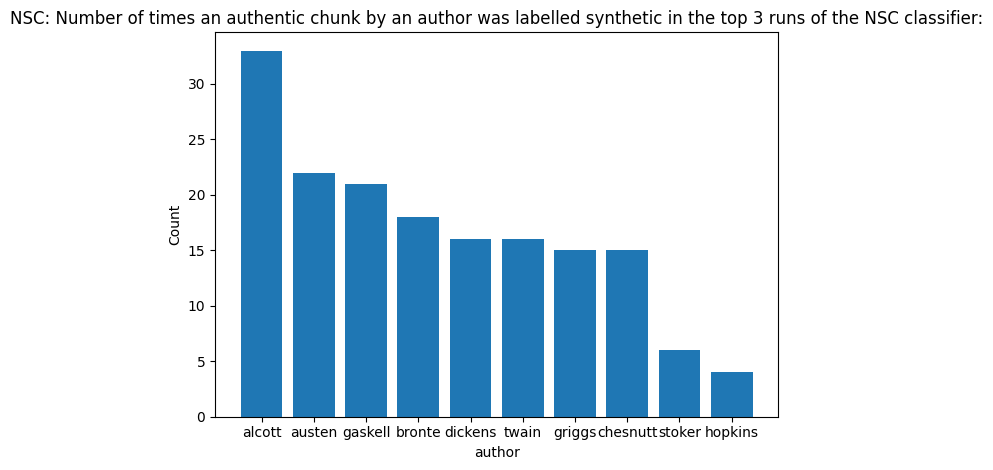

In [44]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(top_df['author'], top_df['Count'])

# Step 2: Labeling the graph
plt.xlabel('author')
plt.ylabel('Count')
plt.title('NSC: Number of times an authentic chunk by an author was labelled synthetic in the top 3 runs of the NSC classifier:')

# Step 3: Show the plot
plt.tight_layout()
plt.show()



In [46]:
top_synthetic = df_top['synthetic_mislabeled'].tolist()

top_synthetic_mislabeled = []

import ast

# Iterate over each string in the list
for item in top_synthetic:
    # Convert the string representation of the list into an actual list using ast.literal_eval
    sublist = ast.literal_eval(item)
    # Extend the flat_list with elements from the sublist
    top_synthetic_mislabeled.extend(sublist)

top_author_mislabeled_syn = []

for x in top_synthetic_mislabeled:
    name = x.split("_")[0]
    top_author_mislabeled_syn.append(name.lower())

top_string_counts_syn = Counter(top_author_mislabeled_syn)

# Create a DataFrame from the Counter dictionary
top_df_syn = pd.DataFrame(list(top_string_counts_syn.items()), columns=['author', 'Count'])
top_df_syn = top_df_syn.sort_values("Count", ascending=False)

print("Number of times an synthetic chunk by GPT mimicking an author was labelled authentic top 3 runs of the NSC classifier:")

top_df_syn.head(10)

Number of times an synthetic chunk by GPT mimicking an author was labelled authentic top 3 runs of the NSC classifier:


,author,Count
1,bronte,19
2,twain,8
0,dickens,7
4,stoker,7
6,hopkins,7
5,griggs,5
3,alcott,4
7,austen,4
8,chesnutt,3
9,gaskell,1


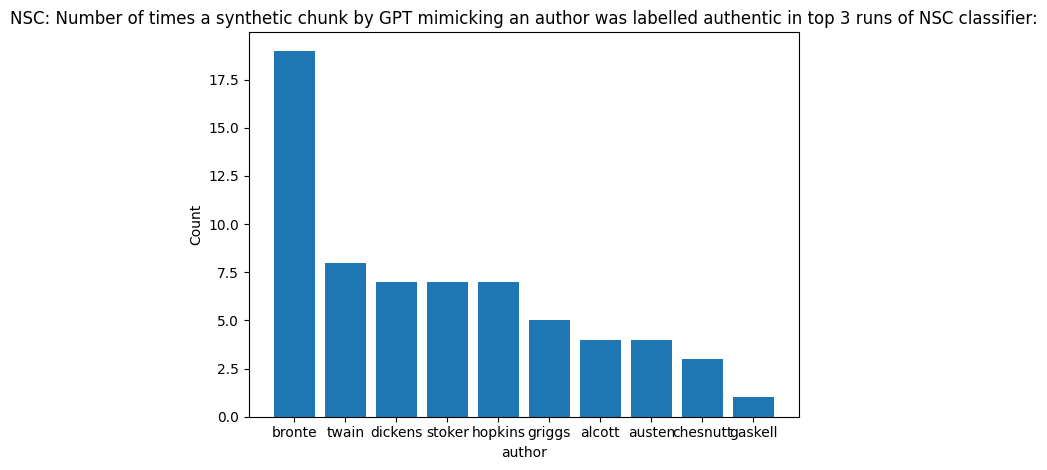

In [47]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(top_df_syn['author'], top_df_syn['Count'])

# Step 2: Labeling the graph
plt.xlabel('author')
plt.ylabel('Count')
plt.title('NSC: Number of times a synthetic chunk by GPT mimicking an author was labelled authentic in top 3 runs of NSC classifier:')

# Step 3: Show the plot
plt.tight_layout()
plt.show()


In [48]:
top_dict_list = []

# Loop through the column, and check if the row is a dictionary or a string
for index, row in df_top['top_10_features'].items():
    if isinstance(row, str):
        # Convert the string to a dictionary
        row_dict = ast.literal_eval(row)
    elif isinstance(row, dict):
        # If it's already a dictionary, use it directly
        row_dict = row
    else:
        # Skip if the row is neither a string nor a dictionary
        print(f"Row {index} is not a valid type, skipping.")
        continue
    
    # Append the dictionary to the list
    top_dict_list.append(row_dict)

all_top_keys = []

# Loop through each dictionary and extract the keys
for d in top_dict_list:
    all_top_keys.extend(d.keys())

# Use Counter to count the occurrences of each key
top_key_counts = Counter(all_top_keys)

# Convert the Counter dictionary to a DataFrame
feature_keys_top_df = pd.DataFrame(list(top_key_counts.items()), columns=['Key', 'Count'])

feature_keys_top_df.sort_values("Count", ascending=False)

,Key,Count
0,mean_sen_len,3
1,VADER_sentiment,3
2,the,3
3,of,3
4,i,3
5,a,3
6,to,3
7,TTR,3
9,he,3
8,male_pronouns,2


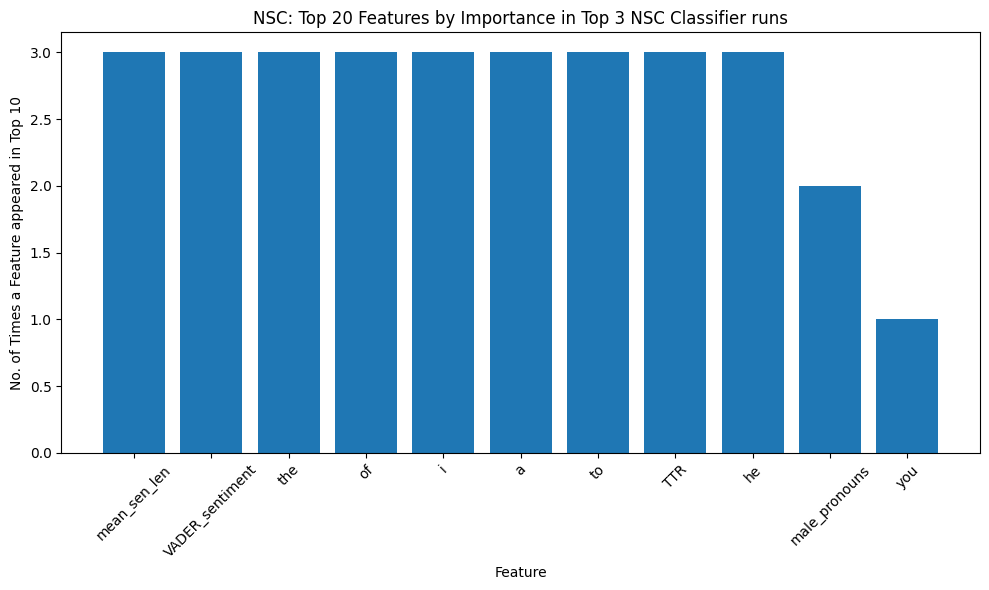

In [49]:
# Assuming df is your DataFrame and you want the top 10 rows based on a 'Count' column
top_top_features_df = feature_keys_top_df.nlargest(20, 'Count')  # Adjust 'Count' to the column you want to sort by

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(top_top_features_df['Key'], top_top_features_df['Count'])  # Use appropriate column names

# Labeling the graph
plt.xlabel('Feature')
plt.ylabel('No. of Times a Feature appeared in Top 10')
plt.title('NSC: Top 20 Features by Importance in Top 3 NSC Classifier runs')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the bar chart
plt.tight_layout()
plt.show()



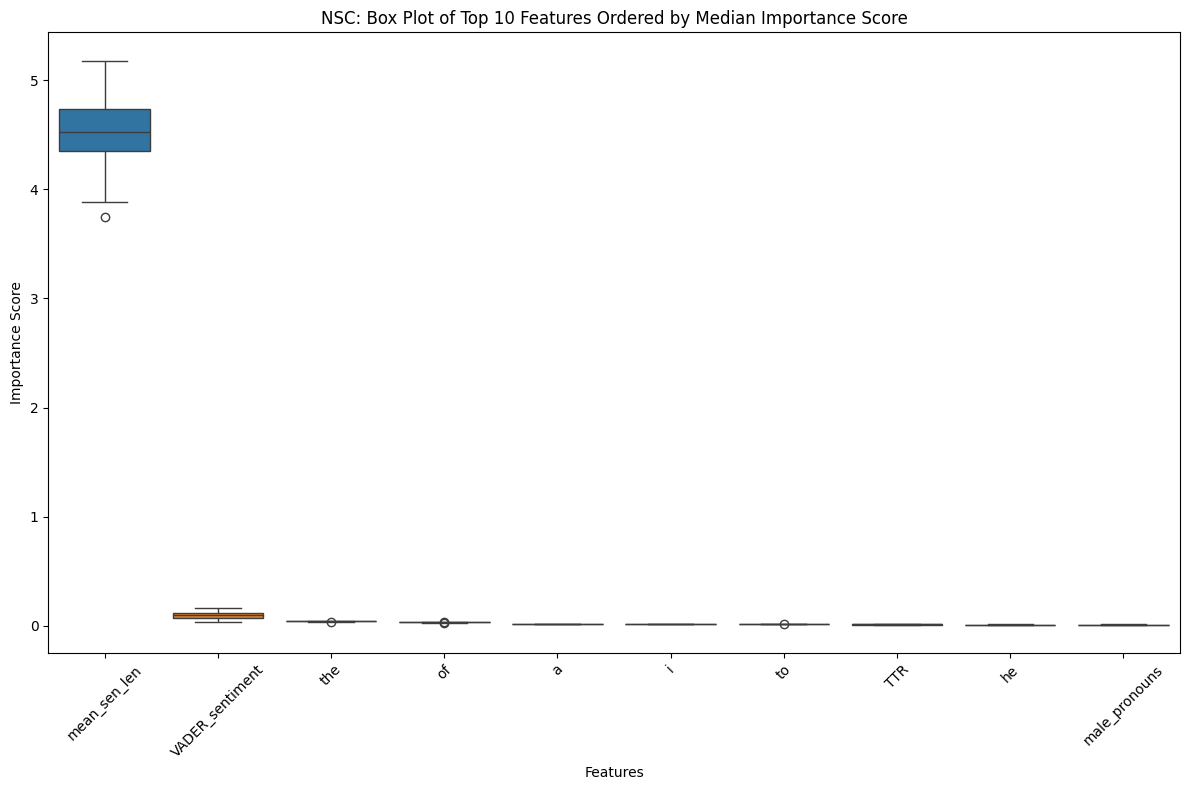

In [50]:

# Step 2: Get the top 20 keys based on their occurrence
top_10_keys_2 = [k for k, v in top_key_counts.most_common(10)]

# Step 3: Create a dictionary to store values associated with each key
top_key_values = {key: [] for key in top_10_keys_2}

# Step 4: Collect values for each key across all dictionaries
for d in top_dict_list:
    for key in top_10_keys:
        if key in d:
            top_key_values[key].append(d[key])

# Step 5: Convert key-values dictionary into a DataFrame for plotting
top_data = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in key_values.items()]))

top_medians = top_data.median().sort_values(ascending=False)
top_data = top_data[top_medians.index]  # Reorder DataFrame columns based on sorted medians

# Step 7: Create a box plot for the top 20 keys ordered by median
plt.figure(figsize=(12, 8))  # Adjust the figure size if necessary
sns.boxplot(data=top_data)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('NSC: Box Plot of Top 10 Features Ordered by Median Importance Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the box plot
plt.tight_layout()
plt.show()
